In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
car_price = pd.read_csv("CarPrice.csv")

In [3]:
car_price

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [4]:
car_price.isna().sum()

car_ID              0
symboling           0
CarName             2
fueltype            2
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           2
carlength           0
carwidth            2
carheight           2
curbweight          0
enginetype          2
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [5]:
for col in car_price.columns:
    if car_price[col].dtype =='object':
        car_price[col].fillna(car_price[col].mode()[0],inplace=True)
    else:
        car_price[col].fillna(car_price[col].mean(),inplace=True)

In [6]:
car_price.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

###### Converting categorical to numerical values using label encoder

In [7]:
label_enc=LabelEncoder()
for col in car_price.columns:
    if car_price[col].dtype=='object':
        car_price[col]=label_enc.fit_transform(car_price[col])

In [8]:
car_price

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,2,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,3,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,1,1,0,1,2,2,0,94.5,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,4,1,0,0,3,1,0,99.8,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,5,1,0,0,3,0,0,99.4,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,138,1,0,0,3,2,0,109.1,...,141,5,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,137,1,1,0,3,2,0,109.1,...,141,5,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,139,1,0,0,3,2,0,109.1,...,173,5,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,141,0,1,0,3,2,0,109.1,...,145,3,3.01,3.40,23.0,106,4800,26,27,22470.0


In [9]:
correlation_matrix = car_price.corr()
correlation_matrix

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,-0.151621,0.952438,-0.125568,0.067729,-0.190352,0.098303,0.051406,0.051483,0.147391,...,-0.033930,0.204898,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093
symboling,-0.151621,1.000000,-0.120212,0.194311,-0.059866,0.664073,-0.596135,-0.041671,0.212471,-0.529207,...,-0.105790,0.091163,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
CarName,0.952438,-0.120212,1.000000,-0.064178,0.035742,-0.171667,0.098161,-0.028154,0.054487,0.038230,...,-0.147507,0.142255,0.183386,-0.182191,0.093005,-0.076305,-0.148954,0.075292,0.088404,-0.220601
fueltype,-0.125568,0.194311,-0.064178,1.000000,-0.401397,0.191491,-0.147853,-0.132257,0.040070,-0.314886,...,-0.069594,0.041529,-0.054451,-0.241829,-0.984356,0.163926,0.476883,-0.255963,-0.191392,-0.105679
aspiration,0.067729,-0.059866,0.035742,-0.401397,1.000000,-0.031792,0.063028,0.066465,-0.057191,0.265279,...,0.108217,0.288086,0.212614,0.222982,0.295541,0.241685,-0.183383,-0.202362,-0.254416,0.177926
doornumber,-0.190352,0.664073,-0.171667,0.191491,-0.031792,1.000000,-0.680358,0.098954,0.137757,-0.441423,...,-0.020742,0.015519,-0.119258,0.011082,-0.177888,0.126947,0.247668,0.012417,0.036330,-0.031835
carbody,0.098303,-0.596135,0.098161,-0.147853,0.063028,-0.680358,1.000000,-0.155745,-0.277009,0.399935,...,-0.073352,-0.065079,0.010549,-0.015325,0.136243,-0.153928,-0.109643,0.031697,-0.007170,-0.083976
drivewheel,0.051406,-0.041671,-0.028154,-0.132257,0.066465,0.098954,-0.155745,1.000000,0.147865,0.450202,...,0.524307,0.424686,0.481827,0.071591,0.127479,0.518686,-0.039417,-0.449581,-0.452220,0.577992
enginelocation,0.051483,0.212471,0.054487,0.040070,-0.057191,0.137757,-0.277009,0.147865,1.000000,-0.188125,...,0.196826,0.105971,0.185042,-0.138455,-0.019762,0.317839,0.198461,-0.153487,-0.102026,0.324973
wheelbase,0.147391,-0.529207,0.038230,-0.314886,0.265279,-0.441423,0.399935,0.450202,-0.188125,1.000000,...,0.557148,0.378265,0.481961,0.161437,0.257776,0.338384,-0.372034,-0.459496,-0.534021,0.554699


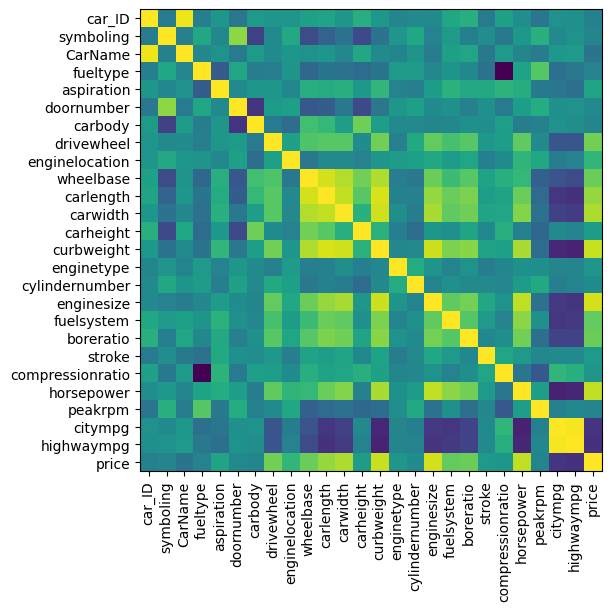

In [10]:
plt.figure(figsize=(8, 6))
plt.imshow(correlation_matrix)
plt.xticks(range(len(correlation_matrix)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix)), correlation_matrix.index)
plt.show()

In [11]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [12]:
X = car_price[['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 
               'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber', 
               'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 
               'highwaympg']]
y = car_price['price']

In [13]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [15]:
LR = LinearRegression()
LR.fit(X_train, y_train)

LinearRegression()

In [16]:
LR.coef_

array([  257.79977331, -4018.3505926 , 11380.40337671,  1342.22819137,
       -1482.52815386, -4480.82818076,  2116.94299184, 11311.67392484,
        1666.02542621,  -682.82951844,  6047.75283226,  2708.41908396,
        7667.22579313,  1714.31998532, -1939.96485793, 20785.36053356,
         832.89126849, -1600.19964812, -3843.41206305, 15218.71048181,
        3821.08509992,  3048.41492101, -4431.51561039,  1462.03059776])

In [17]:
LR.intercept_

-7299.645079162183

In [18]:
y_pred = LR.predict(X_test)

In [19]:
y_pred

array([25783.45165471, 15674.79859496,  9816.84869352, 13674.61279731,
       26870.31906732,  6420.20273385,  8269.12000883,  5834.78854079,
        9552.25922006,  6706.48817345, 14038.56884883,  6430.0302701 ,
       15948.70265586, 10197.71642771, 39379.77291843,  6231.21843834,
        2673.09329346, 14500.05028909,  9763.28336641, 10324.24922064,
       11381.23184961, 21187.77958022,  7705.09487065,  3327.75733949,
        7512.27869016, 24794.97965487, 13995.36550422, 16143.98719082,
        5576.49211797, 16528.66944083, 26739.64395361,  6821.15151897,
        4858.60187081, 21603.48560637,  8269.14766962, 27085.98650912,
       10066.51144576,  9587.11177113,  6584.97021935, 14820.63697248,
        7593.73474313])

In [20]:
error= mean_squared_error(y_pred, y_test)
error

12003867.80692803

In [21]:
r2_score = r2_score(y_pred,y_test)
r2_score

0.810111356563151

In [22]:
root_mse = np.sqrt(error)
root_mse

3464.6598400027715